# Задание 1. 

In [131]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


%matplotlib inline

In [133]:
DATA_PATH = "C:\\Users\\DMITRY\\PY\\"

In [ ]:
def count_top3(years):
    columns = ['Name','Gender','Count']
    big_data = []
    for year in years: 
        big_data.append(pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
        ))
    big_frame = pd.concat(big_data, ignore_index=True)
    big_frame = big_frame.groupby(['Name','Gender']).sum().sort_values(by='Count', ascending=False).reset_index()
    return big_frame.Name.tolist()[:3]

In [219]:
def count_dynamics(years):
    columns = ['Name','Gender','Count']
    output_dict = {}
    m_list = []
    f_list = []
    for year in years: 
        names = pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
            )
        m_list.append(names[names.Gender=='M'].Count.sum())
        f_list.append(names[names.Gender=='F'].Count.sum())
    output_dict["M"] = m_list
    output_dict["F"] = f_list
    return output_dict

{'M': [150486, 1790871, 1962744], 'F': [299810, 1713259, 1814922]}


# # Задание 2.

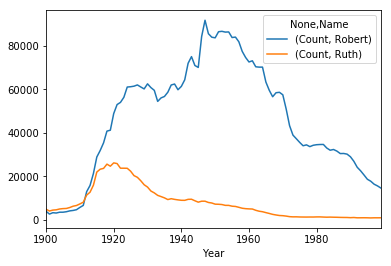

In [348]:
#Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
names_by_year = {}
for year in range(1900,2000,1): 
        names_by_year[year] = pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
        )
names_all = pd.concat(names_by_year, names=["Year", "Pos"])
names_all = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
chosen_names = names_all.query('Name == ["Ruth", "Robert"]').unstack().plot()


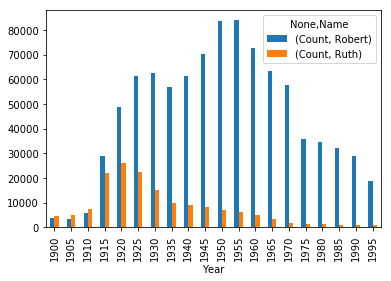

In [258]:
#Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
chosen_names = names_all.query('Name == ["Ruth", "Robert"] & Year == {}'.format([x for x in range(1900,2000,5)])).unstack().plot.bar()


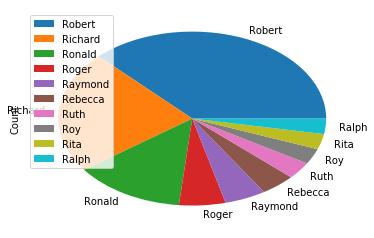

In [344]:
#Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
chosen_names = names_all.query("Year == 1950").reset_index()
a = chosen_names[chosen_names.Name.str.startswith("R")==True].sort_values(by='Count', ascending=False).head(10)
a = a.set_index(a.Name)
a.plot.pie(y="Count")

In [ ]:
#Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

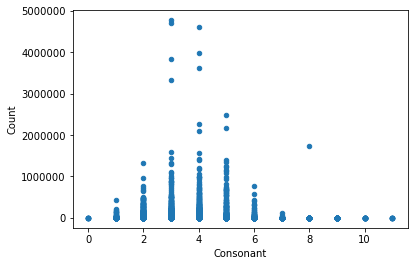

In [385]:
import re


names_all = pd.concat(names_by_year, names=["Year", "Pos"])
big_frame = names_all.groupby(['Name','Gender']).sum().sort_values(by='Count', ascending=False).reset_index()
big_frame['Consonant'] = big_frame.apply(lambda row: len(re.sub(r'[AEIOU]', '', str(row.Name).strip().lower(), flags=re.IGNORECASE)), axis=1)
big_frame.plot.scatter(x='Consonant', y='Count')